In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
Dataset_OIL_GAS=pd.read_excel('Data_No_Conv_Arg.xlsx')
Dataset_Linea144=pd.read_excel('Linea144.xlsx')
Dataset_Dolar_Futuro=pd.read_excel('Tipo_Cambio_USD_Futuro.xlsx')

## Datos Producción Petróleo y Gas Argentina
Este dataset contiene información sobre el historico de pozos no convencionales terminados en Argentina. Contiene detalle segun el pozo, formación, tipo de reservorio, yacimiento, concesión y provincia, longitud de rama horizontal, cantidad de etapas de fractura, tipo de terminacion, toneladas de arena bombeada nacional e importada, agua inyectada, CO2 inyectado, presion maxima, potencia de equipos de fractura, fechas de inicio y fin de fractura y empresa informante.Las variables potencialmente interesantes serian ACUM OIL 1_year y ACUM_Gas_1_year ya que a partir de las mismas podriamos predecir la rentabilidad de los pozos.

In [3]:
Dataset_OIL_GAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id_base_fractura_adjiv        3203 non-null   int64         
 1   idpozo                        3203 non-null   int64         
 2   sigla                         3203 non-null   object        
 3   cuenca                        3203 non-null   object        
 4   areapermisoconcesion          3203 non-null   object        
 5   yacimiento                    3203 non-null   object        
 6   formacion_productiva          3203 non-null   object        
 7   tipo_reservorio               3174 non-null   object        
 8   subtipo_reservorio            2341 non-null   object        
 9   longitud_rama_horizontal_m    3203 non-null   float64       
 10  cantidad_fracturas            3203 non-null   int64         
 11  tipo_terminacion              

## Datos Historicos Llamados Linea 144
Este dataset contine datos sobre los llamados de emergencia registrados en la Linea 144. Esta linea telefonica esta destinada a recibir llamados de emergencia por viloencia de genero. Las personas se comunican a esta linea para dejar sus datos voluntariamente para un seguimiento. Estos regustros corresponden a tres sedes que gestionan la Linea 144: Provincia de Buenos Aires, CABA y la sede de gestion nacional. Los datos corresponden a los años 2020, 2021 y hasta septiempre de 2022. Las variables potencialmente interesantes serian el "genero de la persona en situasión de violencia", "edad de la persona en situacion de violencia" y "vinculo con la persona agresora" ya que esto permitiria realizar una mejor segmentación de las campañas contra la violencia de genero.

In [4]:
Dataset_Linea144.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73494 entries, 0 to 73493
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   fecha                                              73494 non-null  datetime64[ns]
 1   prov_residencia_persona_en_situacion_violencia     72422 non-null  object        
 2   genero_persona_en_situacion_de_violencia           72055 non-null  object        
 3   edad_persona_en_situacion_de_violencia             59232 non-null  float64       
 4   pais_nacimiento_persona_en_situacion_de_violencia  48748 non-null  object        
 5   tipo_de_violencia_fisica                           73494 non-null  object        
 6   tipo_de_violencia_psicologica                      73494 non-null  object        
 7   tipo_de_violencia_sexual                           73494 non-null  object        
 8   tipo_de_violenci

## Tipo de Cambio Dolar Futuro
Este dataset contiene informacion sobre los tipos de cambio historico que existieron en Argentina desde marzo 2002 hasta la actualidad. Datos provenientes del Banco Central. Las variables potencialmente podrian ser "tipo_cambio_a3500" y "tipo_cambio_implicito_en_adrs" ya que estas permitirian analizar cual se acerca mas a las licitaciones del dolar futuro.

In [5]:
Dataset_Dolar_Futuro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7576 entries, 0 to 7575
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   indice_tiempo                  7576 non-null   datetime64[ns]
 1   tipo_cambio_bna_vendedor       2950 non-null   float64       
 2   tipo_cambio_a3500              7576 non-null   float64       
 3   tipo_cambio_mae                5265 non-null   float64       
 4   volumen_mae                    3334 non-null   float64       
 5   tipo_cambio_implicito_en_adrs  7574 non-null   float64       
 6   futuro_rofex_usd1m             5080 non-null   float64       
 7   interes_abierto_1m             5080 non-null   float64       
 8   futuro_rofex_usd2m             5080 non-null   float64       
 9   interes_abierto_2m             5080 non-null   float64       
 10  futuro_rofex_usd3m             5080 non-null   float64       
 11  interes_abierto_3

# Segundo Desafio
Para esta segunda entrega voy a elegir el primer Dataset: Datos Producción Petróleo y Gas Argentina. A continuacion realizaremos algunos gráficos a partir de dichos datos.Comenzaremos con 3 graficos hechos a partir de la libreria Matplotlib.

In [6]:
Dataset_OIL_GAS

,id_base_fractura_adjiv,idpozo,sigla,cuenca,areapermisoconcesion,yacimiento,formacion_productiva,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,...,anio_ff,mes_ff,anio_carga,mes_carga,empresa_informante,mes,anio,GOR,ACUM OIL 1_year,ACUM_Gas_1_year
0,1921,7023,TPT.Ch.S-2203,GOLFO SAN JORGE,EL TORDILLO,EL TORDILLO,comodoro rivadavia,CONVENCIONAL,NaN,0.0,...,2010,1,2019,10,TECPETROL S.A.,1,2010,NaN,NaN,NaN
1,1923,6722,TPT.Ch.S-2028,GOLFO SAN JORGE,EL TORDILLO,EL TORDILLO,mina el carmen,CONVENCIONAL,NaN,0.0,...,2010,2,2019,10,TECPETROL S.A.,2,2010,NaN,NaN,NaN
2,1924,7107,TPT.Ch.S-2161,GOLFO SAN JORGE,EL TORDILLO,EL TORDILLO,comodoro rivadavia,CONVENCIONAL,NaN,0.0,...,2010,2,2019,10,TECPETROL S.A.,2,2010,NaN,NaN,NaN
3,1925,127013,TPT.Ch.S-2553,GOLFO SAN JORGE,EL TORDILLO,EL TORDILLO,mina el carmen,CONVENCIONAL,NaN,0.0,...,2010,3,2019,10,TECPETROL S.A.,3,2010,NaN,NaN,NaN
4,1926,6449,TPT.Ch.S-2309,GOLFO SAN JORGE,EL TORDILLO,EL TORDILLO,comodoro rivadavia,CONVENCIONAL,NaN,0.0,...,2010,4,2019,10,TECPETROL S.A.,4,2010,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,3587,162945,YPF.Nq.LLL-1612(h),NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,vaca muerta,NO CONVENCIONAL,SHALE,3443.0,...,2021,11,2022,4,YPF S.A.,10,2021,0.103247,NaN,NaN
3199,3588,162946,YPF.Nq.LLL-1613(h),NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,vaca muerta,NO CONVENCIONAL,SHALE,3888.0,...,2021,11,2022,4,YPF S.A.,10,2021,0.089978,NaN,NaN
3200,3589,162943,YPF.Nq.LLL-1610(h),NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,vaca muerta,NO CONVENCIONAL,SHALE,4145.0,...,2021,11,2022,4,YPF S.A.,10,2021,0.091336,NaN,NaN
3201,3600,163074,YPF.Nq.LLL-1600(h),NEUQUINA,LOMA CAMPANA,LOMA CAMPANA-LLL,vaca muerta,NO CONVENCIONAL,SHALE,1750.0,...,2021,12,2022,4,YPF S.A.,11,2021,0.192565,NaN,NaN


In [7]:
Dataset_OIL_GAS.rename(columns={'longitud_rama_horizontal_m':'LRH','ACUM OIL 1_year':'Pet_1A'},inplace=True)

In [8]:
DS_OG=Dataset_OIL_GAS

In [9]:
DS_OG.columns

Index(['id_base_fractura_adjiv', 'idpozo', 'sigla', 'cuenca',
       'areapermisoconcesion', 'yacimiento', 'formacion_productiva',
       'tipo_reservorio', 'subtipo_reservorio', 'LRH', 'cantidad_fracturas',
       'tipo_terminacion', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp',
       'fecha_inicio_fractura', 'fecha_fin_fractura', 'fecha_data', 'anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga',
       'empresa_informante', 'mes', 'anio', 'GOR', 'Pet_1A',
       'ACUM_Gas_1_year'],
      dtype='object')

Realizaremos un Grafico de puntos con la variable LHR (Longitud de Rama Horizontal) para observar con mas detalle como se encuentran dichos datos.

In [10]:
x=DS_OG.LRH
y=DS_OG.Pet_1A

Text(0.5, 1.0, 'Longirut Horizontal de Pozo vs. Acumulada Petroleo al Primer Año')

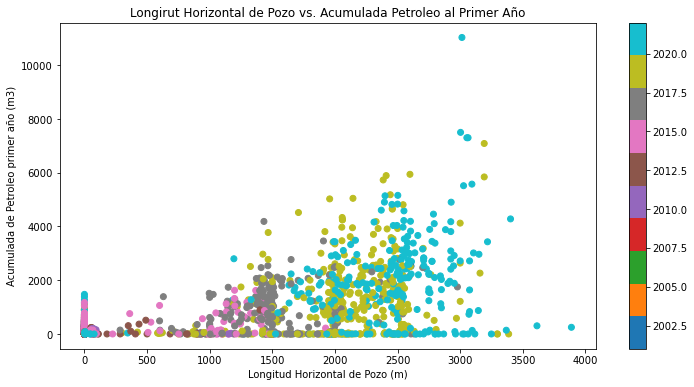

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))  
LONGITUD_OIL = ax.scatter(x,y, c=DS_OG.anio, cmap='tab10')
fig.colorbar(LONGITUD_OIL)
ax.set_xlabel('Longitud Horizontal de Pozo (m)')
ax.set_ylabel('Acumulada de Petroleo primer año (m3)')
ax.set_title('Longirut Horizontal de Pozo vs. Acumulada Petroleo al Primer Año')

En este grafico podemos observar que habria que realizar un tratamiento de limpieza previo a los datos para poder trabjar con ellos ya que se observan algunos valores atipitcos (outliers).Por otro lado observamos pozos con longitud horizontal igual a 0, lo que nos puede indicar que puedieran tratarse de  pozos verticales. Los pozos con acumulada de petroleo igual a 0 pueden deberse a varias razones: pozos de gas, pozos que aun no cumplen un año completo de acumulada o pozos que por problemas operativos no se pusieron en producción.

Realizaremos ahora un boxplot de la Presion Maxima de Fractura para observar como se encuentran los datos de dicha variable.

Text(0.5, 1.0, 'Presion Maxima de Fractura (psi)')

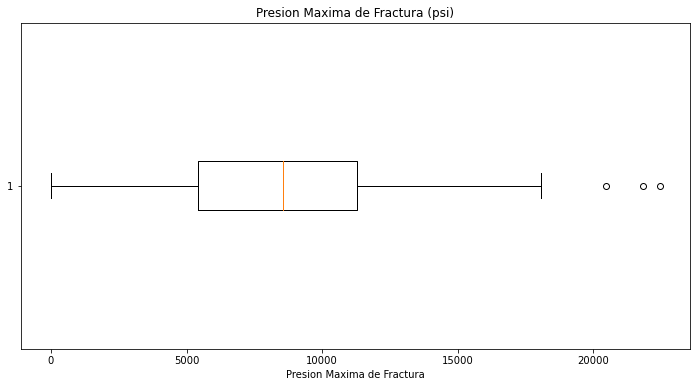

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))  
ax.boxplot(DS_OG['presion_maxima_psi'], vert=False)
ax.set_xlabel('Presion Maxima de Fractura')
ax.set_title('Presion Maxima de Fractura (psi)')

Se puede observar claramente que en esta variable tambien encontramos algunos valores atipicos por lo que necesita ser tratada previo a trabajar con ella. Se observa que la Presion Maxima de Fractura en los yacimientos se encuentra entre alrededor de 5000 psi y 10000psi.Tambien se pueden observar valores de Presion iguales a 0, estos se deben tratar de pozos que no fueron fracturados, por lo que habria que dejarlos por fuera del analisis.

Realizaremos por ultimo un histograma para observar los valores de la variable Agua Inyectada. Veamos a grandes rasgos como se encuentran los valores de esta variable antes de realizar el grafico.

In [13]:
print(Dataset_OIL_GAS['agua_inyectada_m3'].describe())

count      3203.000000
mean      17430.107535
std       29525.980111
min           0.000000
25%         202.500000
50%        3717.200000
75%       31857.150000
max      537184.600000
Name: agua_inyectada_m3, dtype: float64


Text(0.5, 1.0, 'Histograma de Agua Inyectada en m3')

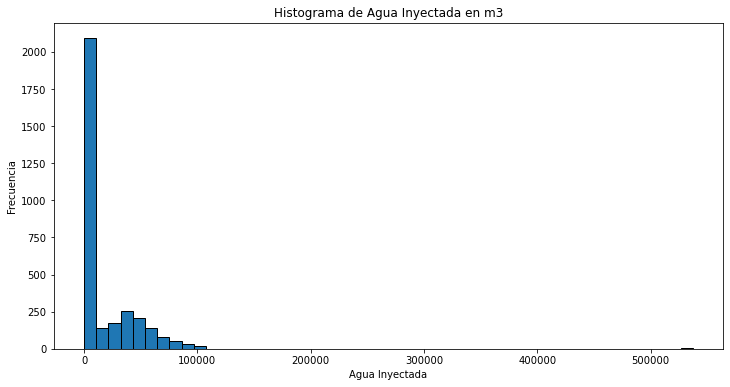

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))  
ax.hist(DS_OG['agua_inyectada_m3'], bins=50, edgecolor="black")
ax.set_xlabel('Agua Inyectada')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Agua Inyectada en m3')

Al igual que los dos primeros graficos se observan valores atipicos de esta variable, valores de mas de 500000 m3 de agua inyectada, que habria que revisar y/o eliminar antes de realizar cálculos a partir de ella. En este caso observamos una alta frecuencia de valores iguales a cero que puede deberse a los pozos donde no se ha implementado la inyección de agua como método para realizar las fracturas en el pozo. De resto se observa una distribución normal en los datos.

A continuacion realizaremos algunos gráficos usando la libreria Seaborn. Realizaremos un grafico de barras para observar como se destribuye la variable "cantidad de fracturas".

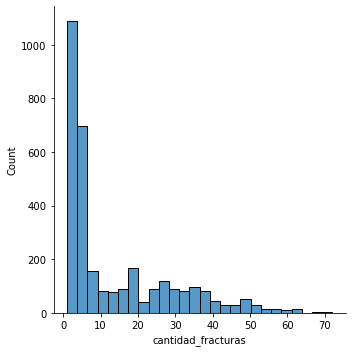

In [15]:
sns.displot(data=DS_OG,x="cantidad_fracturas")

En este gráfico observamos que en la mayoria de los pozos se han realizado una cantidad menor a 10 fracturas, esto se debe a que la mayoria de los pozos posee un régimen de recuperación convencional.Por lo que podriamos sugerir realizar el mismo grfico pero solo usando los datos de pozos no convencionales y de esta manera evaluar la tendencia que se observa al discriminar la cantidad de fracturas segun el tipo de reservorio, formación productiva o el año en el cual se realizaron las fracturas en los pozos.

Comparemos ahora la cantidad de arena bombeada nacional vs la importada a partir de un gráfico de lineas según el tipo de reservorio (Convencional o No convencional).

<AxesSubplot:xlabel='anio', ylabel='arena_bombeada_nacional_tn'>

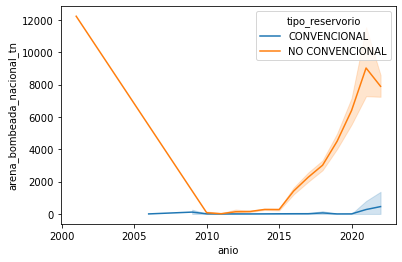

In [16]:
sns.lineplot(data=DS_OG, x="anio", y="arena_bombeada_nacional_tn", hue="tipo_reservorio")

<AxesSubplot:xlabel='anio', ylabel='arena_bombeada_importada_tn'>

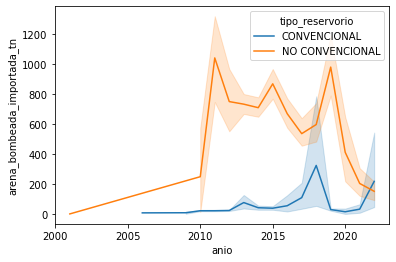

In [17]:
sns.lineplot(data=DS_OG, x="anio", y="arena_bombeada_importada_tn", hue="tipo_reservorio")

Al comparar estos graficos podemos observar que a apartir del año 2015 aproximadamente el bombeo de la arena nacional comenzo a incrementarse y por lo tanto el de arena importada ha venido disminuyendo paulatinamente cada año, esto nos sugiere que los costos deben haber disminuido en gran medida.

Ahora realizaremos un grafico tipo stripplot para observar la distribución de la variable "Potencia Equipos de Fractura" para observar su coportamiento segun el tipo de cuenca.

<AxesSubplot:xlabel='potencia_equipos_fractura_hp', ylabel='cuenca'>

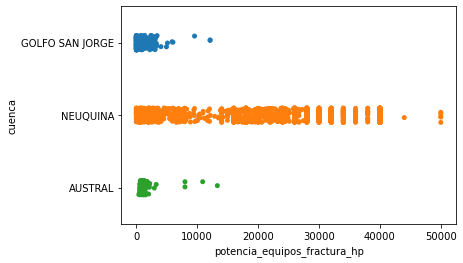

In [18]:
sns.stripplot(data=DS_OG, x="potencia_equipos_fractura_hp", y="cuenca")

En este gráfico podemos observar que la mayor frecuencia de equipos de mayor potencia de fractura se encuentran en los yacimientos de la Cuencia Neuquina, lo que era de esperarse ya que en esa cuenca se encuentra la Formación Vaca Muerta donde se esta llevando a cabo un gran proyecto de recuperación no convencional a partir del fracturamiento. Podemos realizar un último grafico para comprobar esta afirmación. Realicemos un gráfico de barras para observar el tipo de reservorio en cada cuenca.

<AxesSubplot:xlabel='cuenca', ylabel='count'>

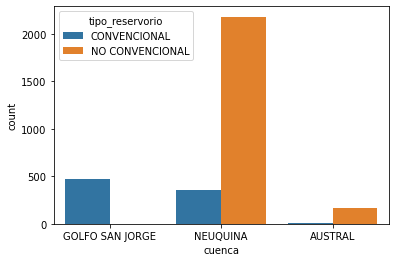

In [19]:
sns.countplot(data=DS_OG, x="cuenca", hue="tipo_reservorio")

Podemos observar claramente que la mayoria de los yacimientos no convencionales se encuentran en la Cuenca Neuquina para las fechas contenidas en el set de datos (a partir del año 2000). Tambien podemos observar que la actividad en dicha cuenca se ha incrementado en los ultimos años con la realizacion de mas pozos en los yacimientos no convencionales.